# Prédiction de la Survie des Passagers du Titanic

## Contexte
Ce projet vise à prédire les chances de survie des passagers du Titanic en utilisant des techniques de machine learning. Nous utiliserons PyCaret pour automatiser le flux de travail et améliorer la productivité.


## Importation des bibliothèques

In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Chargement des données

In [3]:
file_path = 'data/titanic.csv' 
# Utilise la première colonne comme index
data = pd.read_csv(file_path, index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



## Aperçu des données

In [4]:
print(data.head())

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [6]:
print(data.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Prétraitement des données

In [7]:
# Vérification des colonnes disponibles
print(data.columns)

# Conversion des variables catégorielles en variables numériques
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
#  affiche data
data


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True


## Analyse exploratoire des données (EDA)

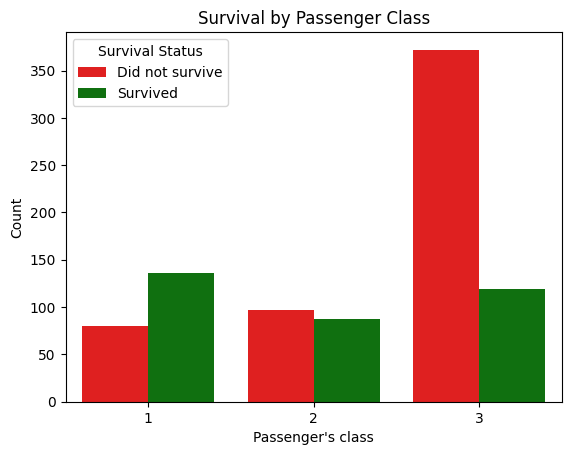

In [32]:
# Création du graphique avec une palette personnalisée
palette = {0: 'red', 1: 'green'}

# Class
sns.countplot(x='Pclass', hue='Survived', data=data, palette=palette)
plt.title('Survival by Passenger Class')

# Modifier les légendes
plt.xlabel("Passenger's class")
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])

plt.show()


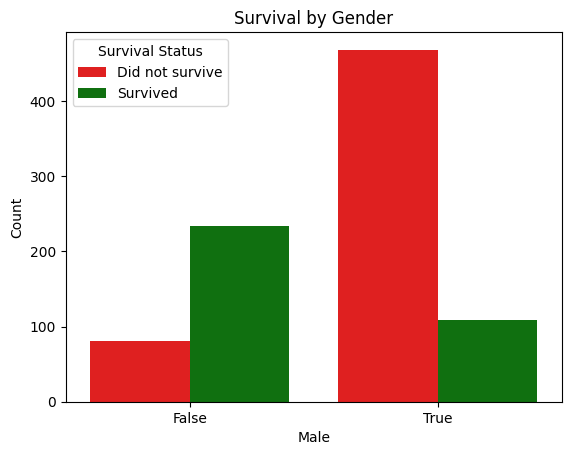

In [25]:
# Genre 

sns.countplot(x='Sex_male', hue='Survived', data=data, palette=palette)
plt.title('Survival by Gender')

# Modifier les légendes
plt.xlabel('Male')
plt.ylabel('Count')
plt.legend(title='Survival Status', labels=['Did not survive', 'Survived'])

plt.show()

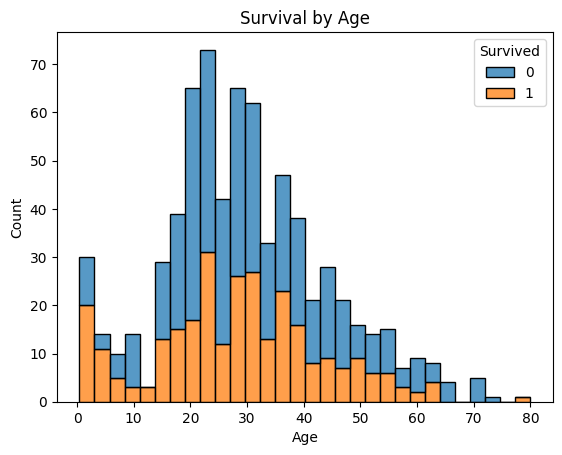

In [30]:
# Age
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival by Age')

plt.show()

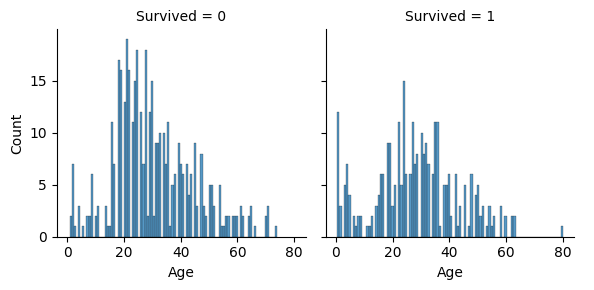

In [11]:
# Age Séparer
g = sns.FacetGrid(data, col='Survived')
g.map(sns.histplot, 'Age', bins=100)
g.add_legend()
plt.show()